# Shortlister:
## Importing Necessary Dependencies:

In [19]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## OpenAI API setup [temporary]:

In [20]:
os.environ['OPENAI_API_KEY'] = ''

## 1. Importing Data from *.pdf*:
- using langchain document_loaders and openai integration.

In [21]:
from langchain.document_loaders import PyMuPDFLoader


In [24]:
cv_file_path = os.path.join('Resume', os.listdir('Resume')[1])
cv_file_path

'Resume\\01.pdf'

In [25]:
loader = PyMuPDFLoader(cv_file_path)
loader

In [26]:
documents = loader.load()
documents[1] # list indexing depends on the pages present in the file

Document(page_content="●\nSecure task persistence with local storage methods, ensuring that your\ntasks are always available.\nMy Projects (My Projects Page)\nproject3_link\nTechnologies used : HTML, CSS, Bootstrap\nDeveloped an online showcase of an individual's projects for interviewer\nassessment\n●\nCrafted the banner segment and project cards with a variety of HTML\nblock and inline elements.\n●\nReﬁned the website's look with CSS3 methods, including background,\nﬂex, box model properties, and a mix of relative (vh, vw) and absolute\n(px) units.\nCertiﬁcates\nPython Bootcamp\nPython programming\nCPP Programming\nCpp programming and concepts\n", metadata={'source': 'Resume\\01.pdf', 'file_path': 'Resume\\01.pdf', 'page': 1, 'total_pages': 2, 'format': 'PDF 1.4', 'title': 'Ravikanth_Reddy_2023-06-12-224234', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'Skia/PDF m116 Google Docs Renderer', 'creationDate': '', 'modDate': '', 'trapped': ''})

## 2. Data Extraction from documents:

In [27]:
documents[1].page_content

"●\nSecure task persistence with local storage methods, ensuring that your\ntasks are always available.\nMy Projects (My Projects Page)\nproject3_link\nTechnologies used : HTML, CSS, Bootstrap\nDeveloped an online showcase of an individual's projects for interviewer\nassessment\n●\nCrafted the banner segment and project cards with a variety of HTML\nblock and inline elements.\n●\nReﬁned the website's look with CSS3 methods, including background,\nﬂex, box model properties, and a mix of relative (vh, vw) and absolute\n(px) units.\nCertiﬁcates\nPython Bootcamp\nPython programming\nCPP Programming\nCpp programming and concepts\n"

In [28]:
# Data Extraction:::
data = [doc.page_content for doc in documents]

## 3. Text Cleaning:

In [29]:
## Pipeline : Text Cleaning
def clean_txt(text):
    # url remover:
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # email addresses remover: 
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Special Character remover:
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # lowercase conversion:
    text = text.lower().strip()

    return text

In [30]:
data[1]

"●\nSecure task persistence with local storage methods, ensuring that your\ntasks are always available.\nMy Projects (My Projects Page)\nproject3_link\nTechnologies used : HTML, CSS, Bootstrap\nDeveloped an online showcase of an individual's projects for interviewer\nassessment\n●\nCrafted the banner segment and project cards with a variety of HTML\nblock and inline elements.\n●\nReﬁned the website's look with CSS3 methods, including background,\nﬂex, box model properties, and a mix of relative (vh, vw) and absolute\n(px) units.\nCertiﬁcates\nPython Bootcamp\nPython programming\nCPP Programming\nCpp programming and concepts\n"

In [31]:
clean_txt(data[1])

'secure task persistence with local storage methods ensuring that your\ntasks are always available\nmy projects my projects page\nprojectlink\ntechnologies used  html css bootstrap\ndeveloped an online showcase of an individuals projects for interviewer\nassessment\n\ncrafted the banner segment and project cards with a variety of html\nblock and inline elements\n\nrened the websites look with css methods including background\nex box model properties and a mix of relative vh vw and absolute\npx units\ncerticates\npython bootcamp\npython programming\ncpp programming\ncpp programming and concepts'

In [32]:
# Cleaning data:
cleaned_data = [clean_txt(text) for text in data]
# cleaned_data

---

## 4. Tokenization:

- Generation of tokens from cleaned text data

In [33]:
tokenized_data = [nltk.word_tokenize(text) for text in cleaned_data]
# tokenized_data

---

## 5. Stopwords Removal:

In [34]:
stop_words = set(stopwords.words('english'))
# stop_words

In [35]:
filtered_data = [[word for word in tokens if word not in stop_words] for tokens in tokenized_data]
# filtered_data

In [36]:
# filtered_data

---

## 6. Lemmatization:

In [37]:
lemmatizer = WordNetLemmatizer()
lemmatized_data = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in filtered_data]

In [38]:
# lemmatized_data

---
## 7. Joining Tokens back for text formation:

In [39]:
preprocessed_data = [" ".join(tokens) for tokens in lemmatized_data]
preprocessed_data[1]

'secure task persistence local storage method ensuring task always available project project page projectlink technology used html cs bootstrap developed online showcase individual project interviewer assessment crafted banner segment project card variety html block inline element rened website look cs method including background ex box model property mix relative vh vw absolute px unit certicates python bootcamp python programming cpp programming cpp programming concept'

---
## 8. Vectorization:

In [40]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_data)

In [41]:
print(X)

  (0, 144)	0.07215127834790694
  (0, 141)	0.07215127834790694
  (0, 46)	0.07215127834790694
  (0, 82)	0.07215127834790694
  (0, 55)	0.07215127834790694
  (0, 100)	0.07215127834790694
  (0, 38)	0.07215127834790694
  (0, 71)	0.07215127834790694
  (0, 74)	0.07215127834790694
  (0, 32)	0.07215127834790694
  (0, 133)	0.07215127834790694
  (0, 48)	0.07215127834790694
  (0, 80)	0.07215127834790694
  (0, 86)	0.07215127834790694
  (0, 42)	0.07215127834790694
  (0, 129)	0.07215127834790694
  (0, 87)	0.14430255669581388
  (0, 135)	0.10267245758242499
  (0, 7)	0.07215127834790694
  (0, 140)	0.07215127834790694
  (0, 95)	0.07215127834790694
  (0, 11)	0.051336228791212496
  (0, 148)	0.07215127834790694
  (0, 104)	0.07215127834790694
  (0, 149)	0.07215127834790694
  :	:
  (1, 73)	0.11566800406971704
  (1, 68)	0.11566800406971704
  (1, 127)	0.11566800406971704
  (1, 99)	0.11566800406971704
  (1, 43)	0.11566800406971704
  (1, 101)	0.11566800406971704
  (1, 2)	0.11566800406971704
  (1, 54)	0.11566800406

---

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)
clusters

array([-1, -1], dtype=int64)

In [45]:
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(X.toarray())
reduced_features

array([[ 6.38006309e-01,  4.93769619e-16],
       [-6.38006309e-01,  4.93769619e-16]])

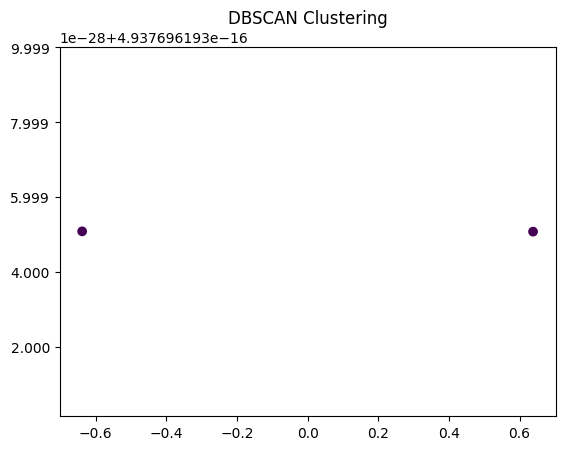

In [44]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)
plt.title("DBSCAN Clustering")
plt.show()